# Exercise 1a

## Monte-Carlo Simulation

### Data Creation and Visualization
#### Method
- Let X be a random variable whose distribution can be described by the cumulative distribution function $F_{x}$.
- We want to generate values of X which are distributed according to this distribution.

The inverse transform sampling method works as follows:

1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Find the inverse of the desired CDF, e.g. $F^{-1}_{X}(x)$.
3. Compute $X = F^{-1}_{X}(u)$. The computed random variable $X$ has distribution $F_{X}(x)$.
---
Information taken from [Wikipedia](https://en.wikipedia.org/wiki/Inverse_transform_sampling)

#### Application
Sampling $p(Y=0) = p(Y=1) = \frac{1}{2}$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Round random number to 1 if it is $\geq$ 0.5, otherwise round it to 0.

Sampling $p(X=x|Y=0) = 2-2x$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Calculate inversion $F^{-1}_{X}(x)$
$$F_{X}(x) = \int_{0}^{x}  2-2x\,dx $$
$$F_{X}(x) = 2x-x^{2} $$
$$F^{-1}_{X}(x) = 1-\sqrt{1-x}, 1+\sqrt{1-x}$$

3. Compute $X = 1-\sqrt{1-u}$, as the other case is not in range of $[0,1]$. The computed random variable $X$ has distribution $2-2x$

Sampling $p(X=x|Y=1) = 2x$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Calculate inversion $F^{-1}_{X}(x)$
$$F_{X}(x) = \int_{0}^{x}  2x\,dx $$
$$F_{X}(x) = x^{2} $$
$$F^{-1}_{X}(x) = -\sqrt{x}, \sqrt{x}$$

3. Compute $X = \sqrt{u}$, as the other case is not in range of $[0,1]$. The computed random variable $X$ has distribution $2x$

In [1]:
import numpy.random as random
import numpy as np
import math as math

In [2]:
# Returns an Array [[N/2 samples for p(X|Y=0)], [N/2 samples for p(X|Y=1)]]
def create_data (N):
    p0 = [1-(math.sqrt(1-random.random())) for element in range(math.floor(N/2))]
    p1 = [math.sqrt(random.random()) for element in range(math.floor(N/2))]
    return [p0, p1]

In [3]:
data = create_data(1000000)

In [4]:
import matplotlib.pyplot as plt

(array([95045., 85093., 75183., 65249., 54784., 45097., 34826., 24923.,
        14776.,  5024.]),
 array([1.25096310e-06, 9.99598281e-02, 1.99918405e-01, 2.99876982e-01,
        3.99835559e-01, 4.99794137e-01, 5.99752714e-01, 6.99711291e-01,
        7.99669868e-01, 8.99628445e-01, 9.99587022e-01]),
 <BarContainer object of 10 artists>)

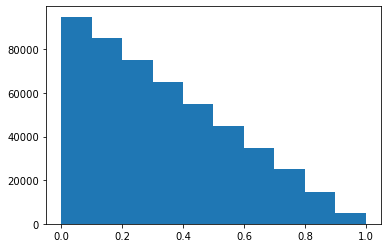

In [5]:
plt.hist(data[0])

(array([ 5152., 15086., 24810., 35171., 45120., 54808., 64997., 74832.,
        85111., 94913.]),
 array([0.00132808, 0.1011951 , 0.20106213, 0.30092915, 0.40079618,
        0.5006632 , 0.60053023, 0.70039725, 0.80026427, 0.9001313 ,
        0.99999832]),
 <BarContainer object of 10 artists>)

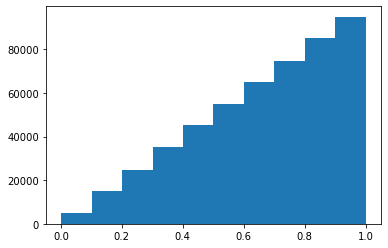

In [6]:
plt.hist(data[1])